# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [147]:
m = 1
A = 0.15#0.12699485911198283#0.04
run = 1

twod=true
zeroformat=false

## grid
Agrid=0.35
kgrid=0.7
mgrid=0.5#0.55
fgrid=5

5

In [148]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [149]:
global compactified=true
global loggrid=true

global bisection=true

true

In [150]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*200.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [151]:
iter=1

1

In [152]:
print(N)

200.0

In [153]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [154]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [155]:

if loggrid==true
    ori=(tan(-mgrid/Agrid)/fgrid+kgrid)#0.0#Float128(0.0)#0.0;
    Xf=(tan((1-mgrid)/Agrid)/fgrid+kgrid)
else
    ori=0.0
    Xf=1.0
end

dx=(Xf-ori)/N

initX1 = nothing

initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
#initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX1)+6;
println("step size is  ", dx)
println("the time step is ", dt)

initX=[ori-3*dx; ori-2*dx; ori-dx; collect(initX1); Xf+dx; Xf+2*dx; Xf+3*dx];

step size is  0.013967290701641022
the time step is 0.0005


# Initial data of m β Ψ and Ψ,x

In [156]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,R FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [157]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [158]:
y0=[0.0, 0.0, 0.0]#Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

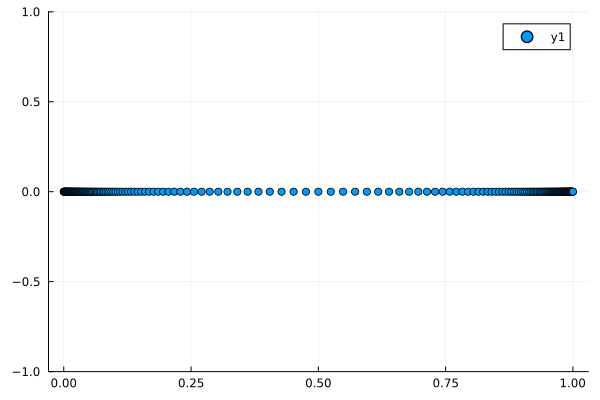

In [159]:
using Plots
scatter(inverse.(initX1), zeros(length(initX1)), ylim=[-1,1])

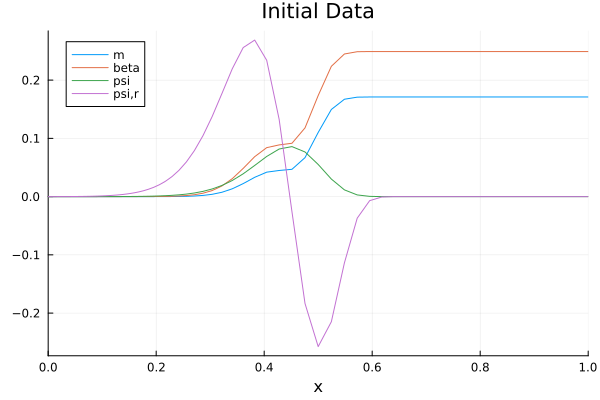

In [160]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

In [161]:
monitor_ratio=zeros(L)
global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ inverse(initX[5:L-4]) .* (1 .- inverse(initX[5:L-4]));

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [162]:
using Tables

global files=["m", "beta", "psi", "derpsi"]

#print_muninn(files, t, state_array[:,1:5],res,"a")
print_muninn(files, 0, state_array[:,1:5],res,"w")

In [163]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [164]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx)/dt)

1.0984588174848615


In [165]:
using Base.Threads
Threads.nthreads()

4

In [166]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [167]:
finaltime=3.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



Hessian is really big!

597.9631581225084 time is 0.0005492294087424308


Hessian is really big!

597.3830133126463 time is 0.0010984588174340324


Hessian is really big!

596.8009885779692 time is 0.0016476882261228876


Hessian is really big!

596.2170904479326 time is 0.002196917634808956


Hessian is really big!

595.6313254250435 time is 0.0027461470434921964


Hessian is really big!

595.043699985124 time is 0.0032953764521725677


Hessian is really big!

594.4542205775697 time is 0.0038446058608500276


Hessian is really big!

593.8628936256064 time is 0.004393835269524534


Hessian is really big!

593.2697255265422 time is 0.004943064678196044


Hessian is really big!

592.6747226520181 time is 0.005492294086864514


Hessian is really big!

592.0778913482517 time is 0.006041523495529899


Hessian is really big!

591.4792379362827 time is 0.006590752904192156


Hessian is really big!

590.8787687122128 time is 0.007139982312851238


Hessian is really big!

590.276489947443 tim



Hessian is really big!

523.4045320248595 time is 0.06151369374380935


Hessian is really big!

522.6508330138004 time is 0.06206292315179208


Hessian is really big!

521.8958573811549 time is 0.06261215255976274


Hessian is really big!

521.1396097415641 time is 0.06316138196772118


Hessian is really big!

520.3820946988811 time is 0.06371061137566726


Hessian is really big!

519.6233168462444 time is 0.06425984078360082


Hessian is really big!

518.8632807661492 time is 0.06480907019152171


Hessian is really big!

518.1019910305238 time is 0.06535829959942978


Hessian is really big!

517.3394522007973 time is 0.06590752900732487


Hessian is really big!

516.5756688279757 time is 0.06645675841520682


Hessian is really big!

515.8106454527089 time is 0.06700598782307546


Hessian is really big!

515.0443866053613 time is 0.06755521723093064


Hessian is really big!

514.2768968060848 time is 0.06810444663877219


Hessian is really big!

513.5081805648825 time is 0.0686536760



Hessian is really big!

507.13739680926255 time is 0.13016736958091427


Hessian is really big!

507.11239194747725 time is 0.13071659898553795


Hessian is really big!

507.0847656859197 time is 0.13126582839011205


Hessian is really big!

507.05452254738185 time is 0.13181505779463606


Hessian is really big!

507.0216670496874 time is 0.13236428719910945


Hessian is really big!

506.98620370567596 time is 0.13291351660353168


Hessian is really big!

506.9481370231839 time is 0.13346274600790223


Hessian is really big!

506.9074715050289 time is 0.13401197541222057


Hessian is really big!

506.8642116489931 time is 0.13456120481648615


Hessian is really big!

506.81836194780453 time is 0.1351104342206984


Hessian is really big!

506.7699268891219 time is 0.1356596636248568


Hessian is really big!

506.7189109555193 time is 0.13620889302896072


Hessian is really big!

506.66531862446664 time is 0.13675812243300967


Hessian is really big!

506.6091543683156 time is 0.137307



Hessian is really big!

508.87827387078664 time is 1.2404461115032464


Hessian is really big!

510.2296203280656 time is 1.2409138462779195


Hessian is really big!

511.54557285949556 time is 1.2413808906346484


Hessian is really big!

512.8254907465813 time is 1.2418472448768776


Hessian is really big!

514.0687318444235 time is 1.2423129093037362


Hessian is really big!

515.2746527524606 time is 1.2427778842100687


Hessian is really big!

516.4426089891437 time is 1.2432421698864664


Hessian is really big!

517.5719551705256 time is 1.243705766619298


Hessian is really big!

518.6620451927741 time is 1.2441686746907417


Hessian is really big!

519.7122324186058 time is 1.2446308943788151


Hessian is really big!

520.7218698676163 time is 1.245092425957408


Hessian is really big!

521.6903104105177 time is 1.2455532696963132


Hessian is really big!

522.6169069672518 time is 1.2460134258612574


Hessian is really big!

523.5010127089778 time is 1.2464728947139339


Hess



Hessian is really big!

600.5384166709935 time is 1.2893698425304039


Hessian is really big!

600.9836432563993 time is 1.2897600060600434


Hessian is really big!

601.3708836456639 time is 1.2901494940075262


Hessian is really big!

601.6994637655514 time is 1.2905383064043165


Hessian is really big!

601.9687151964351 time is 1.2909264432815586


Hessian is really big!

602.1779754722696 time is 1.2913139046701119


Hessian is really big!

602.3265883829143 time is 1.2917006906005863


Hessian is really big!

602.4139042786488 time is 1.2920868011033777


Hessian is really big!

602.4392803767761 time is 1.2924722362087027


Hessian is really big!

602.4020810701254 time is 1.2928569959466347


Hessian is really big!

602.3016782373404 time is 1.2932410803471386


Hessian is really big!

602.1374515547768 time is 1.2936244894401066


Hessian is really big!

601.9087888098638 time is 1.2940072232553934


Hessian is really big!

601.6150862157484 time is 1.2943892818228517


Hess



Hessian is really big!

681.6290113233122 time is 1.3301339986210097


Hessian is really big!

680.6593985633777 time is 1.330446172672217


Hessian is really big!

679.6159363573599 time is 1.3307576813161415


iteration 2500 dt is 0.00031084344971622015, t=1.3310685247658578 speed is 0.7977666631332544, dx/dt=44.93352108398054


Hessian is really big!

678.4982345297174 time is 1.3310685247658578
 monitor ratio is 0.6289687485147344

Hessian is really big!

677.3059167610852 time is 1.3313787032375604


Hessian is really big!

676.038620838737 time is 1.3316882169505848


Hessian is really big!

674.6959989033613 time is 1.3319970661274287


Hessian is really big!

673.277717691948 time is 1.332305250993772


Hessian is really big!

671.7834587765938 time is 1.3326127717784972


Hessian is really big!

670.2129187990145 time is 1.33291962871371


Hessian is really big!

668.565809700577 time is 1.3332258220347588


Hessian is really big!

666.8418589476452 time is 1.333531351980255



Hessian is really big!

774.869698929184 time is 1.3612712226298131


Hessian is really big!

773.3243954985701 time is 1.3615103809820683


Hessian is really big!

772.9023232406633 time is 1.361748920833172


Hessian is really big!

773.0534398033349 time is 1.3619868428143909


Hessian is really big!

773.18057607185 time is 1.3622241475607422


Hessian is really big!

773.2841716164714 time is 1.362460835710987


Hessian is really big!

773.364663255598 time is 1.3626969079076252


Hessian is really big!

773.4224850025761 time is 1.3629323647968892


Hessian is really big!

773.4580680150862 time is 1.3631672070287375


Hessian is really big!

773.4718405470385 time is 1.3634014352568489


Hessian is really big!

773.4642279029115 time is 1.3636350501386145


Hessian is really big!

773.4356523944813 time is 1.363868052335132


Hessian is really big!

773.3865332998729 time is 1.3641004425111978


Hessian is really big!

773.3172868248706 time is 1.3643322213352989


Hessian is 



Hessian is really big!

917.0865840890772 time is 1.384552725743059


Hessian is really big!

916.4449783551677 time is 1.3847267930962708


Hessian is really big!

915.7529389022526 time is 1.384900334067492


Hessian is really big!

915.0104845682057 time is 1.3850733496215313


Hessian is really big!

914.2176415528594 time is 1.3852458407250747


Hessian is really big!

913.3744434094872 time is 1.385417808346665


Hessian is really big!

912.4809310340937 time is 1.3855892534566823


Hessian is really big!

911.5371526525115 time is 1.385760177027324


Hessian is really big!

910.5431638053201 time is 1.3859305800325852


Hessian is really big!

909.4990273305884 time is 1.3861004634482383


Hessian is really big!

908.4048133444421 time is 1.386269828251814


Hessian is really big!

907.2605992194835 time is 1.3864386754225804


Hessian is really big!

906.0664695610543 time is 1.3866070059415236


Hessian is really big!

904.8225161813688 time is 1.3867748207913275


Hessian i



Hessian is really big!

1058.2613947810264 time is 1.4012474913694841


Hessian is really big!

1059.4654977508096 time is 1.4013680791106677


Hessian is really big!

1060.642389091562 time is 1.4014882575546315


Hessian is really big!

1061.7920658703445 time is 1.401608027746086


Hessian is really big!

1062.9145278267097 time is 1.4017273907292893


Hessian is really big!

1064.0097773621294 time is 1.4018463475480292


Hessian is really big!

1065.0778195289413 time is 1.4019648992456066


Hessian is really big!

1066.1186620188253 time is 1.4020830468648187


Hessian is really big!

1067.1323151508304 time is 1.4022007914479422


Hessian is really big!

1068.1187918589383 time is 1.402318134036717


Hessian is really big!

1069.0781076791566 time is 1.4024350756723292


Hessian is really big!

1070.010280736201 time is 1.402551617395395


Hessian is really big!

1070.915331729701 time is 1.402667760245944


Hessian is really big!

1071.793283919995 time is 1.4027835052634043




Hessian is really big!

1200.8705076061517 time is 1.4125234467716894


Hessian is really big!

1204.328894635507 time is 1.412604194472309


Hessian is really big!

1207.8145815858245 time is 1.4126846447763763


Hessian is really big!

1211.3276457422153 time is 1.4127647985951268


Hessian is really big!

1214.8681638365454 time is 1.4128446568381032


Hessian is really big!

1218.4362120464727 time is 1.4129242204131516


Hessian is really big!

1222.031865994321 time is 1.413003490226415


Hessian is really big!

1225.6552007459368 time is 1.4130824671823299


Hessian is really big!

1229.3062908094053 time is 1.4131611521836207


Hessian is really big!

1232.9852101336571 time is 1.4132395461312954


Hessian is really big!

1236.6920321069686 time is 1.4133176499246403


Hessian is really big!

1240.4268295554355 time is 1.4133954644612163


Hessian is really big!

1244.189674741225 time is 1.413472990636854


Hessian is really big!

1247.9806393608453 time is 1.413550229345649



Hessian is really big!

2071.9894148187013 time is 1.4200194466357694


Hessian is really big!

2082.219574329707 time is 1.4200717017767945


Hessian is really big!

2092.4124883357413 time is 1.420123751381128


Hessian is really big!

2102.56720750404 time is 1.4201755961498654


Hessian is really big!

2112.682778563898 time is 1.4202272367820776


Hessian is really big!

2122.7582443634988 time is 1.4202786739748081


Hessian is really big!

2132.792643927663 time is 1.4203299084230725


Hessian is really big!

2142.7850125160307 time is 1.420380940819857


Hessian is really big!

2152.7343816817547 time is 1.4204317718561175


Hessian is really big!

2162.6397793308865 time is 1.4204824022207774


Hessian is really big!

2172.5002297821247 time is 1.4205328326007272


Hessian is really big!

2182.3147538272833 time is 1.4205830636808228


Hessian is really big!

2192.082368792247 time is 1.4206330961438847


Hessian is really big!

2201.8020885984133 time is 1.4206829306706965




Hessian is really big!

2753.8698359471155 time is 1.4247746562059027


Hessian is really big!

2763.0227425092876 time is 1.4248076449609195


Hessian is really big!

2773.0806229471323 time is 1.4248404945553477


Hessian is really big!

2783.158680054233 time is 1.4248732054645328


Hessian is really big!

2793.256721849104 time is 1.424905778162005


Hessian is really big!

2803.3745547888593 time is 1.4249382131194843


Hessian is really big!

2813.5119837750144 time is 1.4249705108068884


Hessian is really big!

2823.6688121589204 time is 1.4250026716923374


Hessian is really big!

2833.8448417477093 time is 1.4250346962421612


Hessian is really big!

2844.0398728100054 time is 1.425066584920905


Hessian is really big!

2854.2537040820766 time is 1.4250983381913365


Hessian is really big!

2864.4861327739545 time is 1.425129956514452


Hessian is really big!

2874.736954575579 time is 1.4251614403494828


Hessian is really big!

2885.0059636632477 time is 1.425192790153902



Hessian is really big!

4958.434507355389 time is 1.4277422570342635


Hessian is really big!

4993.891725714394 time is 1.4277620542614409


Hessian is really big!

5029.436989791209 time is 1.427781756588736


Hessian is really big!

5065.069534081946 time is 1.4278013643338083


Hessian is really big!

5100.788586219451 time is 1.4278208778134391


Hessian is really big!

5136.593366999608 time is 1.4278402973435427


Hessian is really big!

5172.483090405526 time is 1.4278596232391745


Hessian is really big!

5208.45696363739 time is 1.4278788558145425


Hessian is really big!

5244.514187138987 time is 1.427897995383016


iteration 3300 dt is 1.904687411958398e-5, t=1.4279170422571357 speed is 13.01948761145878, dx/dt=733.3114407093112


Hessian is really big!

5280.653954629178 time is 1.4279170422571357
 monitor ratio is 0.9017825860665852

Hessian is really big!

5316.875453131257 time is 1.4279359967486231


Hessian is really big!

5353.17786300694 time is 1.427954859168391



Hessian is really big!

9305.837767866306 time is 1.4294488490301922


Hessian is really big!

9345.149408846943 time is 1.4294597854881714


Hessian is really big!

9384.433945479163 time is 1.429470659392391


Hessian is really big!

9423.690310867287 time is 1.4294814710091501


Hessian is really big!

9462.917441792786 time is 1.4294922206044445


Hessian is really big!

9502.114278824389 time is 1.429502908443961


Hessian is really big!

9541.279766434018 time is 1.4295135347930756


Hessian is really big!

9580.41285310468 time is 1.4295240999168486


Hessian is really big!

9619.51249143914 time is 1.42953460408002


Hessian is really big!

9658.577638269428 time is 1.4295450475470066


Hessian is really big!

9697.607254763845 time is 1.4295554305818967


Hessian is really big!

9736.600306530514 time is 1.429565753448446


Hessian is really big!

9775.555763723314 time is 1.4295760164100735


Hessian is really big!

9814.472601142601 time is 1.429586219729856


Hessian is r



Hessian is really big!

13360.330601987484 time is 1.4303481523813075


Hessian is really big!

13391.081746614027 time is 1.4303535821069377


Hessian is really big!

13421.722082875343 time is 1.430358975887194


Hessian is really big!

13452.2513487086 time is 1.4303643339330185


Hessian is really big!

13482.669289614256 time is 1.4303696564545492


Hessian is really big!

13512.975658617825 time is 1.4303749436611175


Hessian is really big!

13543.170216236045 time is 1.4303801957612488


Hessian is really big!

13573.25273044242 time is 1.4303854129626612


Hessian is really big!

13603.222976628304 time is 1.430390595472265


Hessian is really big!

13633.080737567185 time is 1.4303957434961623


Hessian is really big!

13662.825803379701 time is 1.4304008572396458


Hessian is really big!

13692.457971490321 time is 1.4304059369071986


Hessian is really big!

13721.977046595084 time is 1.4304109827024938


Hessian is really big!

13751.382840621058 time is 1.43041599482839



Hessian is really big!

16133.623167565804 time is 1.4307809113756513


Hessian is really big!

16151.590436400602 time is 1.4307834061562785


Hessian is really big!

16169.455252356413 time is 1.430785883791972


Hessian is really big!

16187.217923883762 time is 1.4307883444012741


Hessian is really big!

16204.878761606222 time is 1.4307907881019577


Hessian is really big!

16222.438078278867 time is 1.430793215011029


Hessian is really big!

16239.89618874191 time is 1.4307956252447294


Hessian is really big!

16257.253409874289 time is 1.4307980189185376


Hessian is really big!

16274.51006055209 time is 1.4308003961471725


Hessian is really big!

16291.666461598883 time is 1.430802757044594


Hessian is really big!

16308.722935748943 time is 1.4308051017240073


Hessian is really big!

16325.678193086427 time is 1.4308074300762683


Hessian is really big!

16342.531726414134 time is 1.4308097420994508


Hessian is really big!

16359.283900092003 time is 1.43081203791045



Hessian is really big!

17588.7419976187 time is 1.4309765176019107


Hessian is really big!

17597.24776644293 time is 1.4309776500109865


Hessian is really big!

17605.691481308855 time is 1.4309787745236837


Hessian is really big!

17614.07350639669 time is 1.4309798911939355


Hessian is really big!

17622.394204942364 time is 1.430981000075284


Hessian is really big!

17630.653939230848 time is 1.430982101220884


Hessian is really big!

17638.853070583184 time is 1.4309831946835063


Hessian is really big!

17646.991959348892 time is 1.430984280515541


Hessian is really big!

17655.070964897106 time is 1.4309853587690018


Hessian is really big!

17663.090445604696 time is 1.4309864294955283


Hessian is really big!

17671.050758853107 time is 1.430987492746391


Hessian is really big!

17678.9522610106 time is 1.430988548572493


Hessian is really big!

17686.795307433138 time is 1.4309895970243744


Hessian is really big!

17694.580252449017 time is 1.430990638152216


He



Hessian is really big!

19387.56809939066 time is 1.4310651745652596


Hessian is really big!

19403.7011086845 time is 1.4310656722807968


Hessian is really big!

19419.747428809977 time is 1.4310661663629325


Hessian is really big!

19435.707357304538 time is 1.4310666568379207


Hessian is really big!

19451.581192194855 time is 1.4310671437318372


Hessian is really big!

19467.369231997258 time is 1.4310676270705809


Hessian is really big!

19483.071775711025 time is 1.4310681068798747


Hessian is really big!

19498.68912281185 time is 1.431068583185267


Hessian is really big!

19514.221573245308 time is 1.4310690560121322


Hessian is really big!

19529.6694273985 time is 1.4310695253856718


Hessian is really big!

19545.032986108192 time is 1.4310699913309155


Hessian is really big!

19560.312550654515 time is 1.4310704538727226


Hessian is really big!

19575.508422740037 time is 1.4310709130357824


Hessian is really big!

19590.62090448352 time is 1.4310713688446155




Hessian is really big!

20724.68443537303 time is 1.4311033294242834


Hessian is really big!

20732.787323008026 time is 1.431103542969014


Hessian is really big!

20740.83699530388 time is 1.4311037549225278


Hessian is really big!

20748.833752901155 time is 1.4311039652969633


Hessian is really big!

20756.777895378622 time is 1.4311041741043622


Hessian is really big!

20764.66972126994 time is 1.4311043813566715


Hessian is really big!

20772.509528055412 time is 1.4311045870657437


Hessian is really big!

20780.297612153943 time is 1.4311047912433377


Hessian is really big!

20788.03426891546 time is 1.4311049939011191


Hessian is really big!

20795.719792605 time is 1.4311051950506612


Hessian is really big!

20803.354277540242 time is 1.4311053946982473


Hessian is really big!

20810.93608185665 time is 1.4311055928047685


Hessian is really big!

20818.4655304056 time is 1.4311057893825443


Hessian is really big!

20825.942946641997 time is 1.4311059844437914


H



Hessian is really big!

21359.992224026515 time is 1.431119540668874


Hessian is really big!

21363.611993301827 time is 1.4311196302760212


Hessian is really big!

21367.204340824694 time is 1.4311197191779048


Hessian is really big!

21370.76946670207 time is 1.4311198073801672


Hessian is really big!

21374.307569667595 time is 1.4311198948884027


Hessian is really big!

21377.81884704431 time is 1.4311199817081572


Hessian is really big!

21381.303494797245 time is 1.4311200678449294


Hessian is really big!

21384.761707496484 time is 1.4311201533041702


Hessian is really big!

21388.193678370135 time is 1.4311202380912844


Hessian is really big!

21391.59959927665 time is 1.4311203222116302


Hessian is really big!

21394.97966072225 time is 1.4311204056705198


Hessian is really big!

21398.33405188745 time is 1.4311204884732203


Hessian is really big!

21401.662960608883 time is 1.4311205706249535


Hessian is really big!

21404.96657340616 time is 1.4311206521308968



Hessian is really big!

21634.13878900095 time is 1.4311262585234792


Hessian is really big!

21635.633337562358 time is 1.4311262948097


Hessian is really big!

21637.11575369186 time is 1.4311263307982784


iteration 4200 dt is 3.569333991048961e-8, t=1.4311263664916183 speed is 6947.529770506615, dx/dt=391313.63824925484


Hessian is really big!

21638.58613294289 time is 1.4311263664916183
 monitor ratio is 0.9570305489667538

Hessian is really big!

21640.044570120695 time is 1.4311264018921037


Hessian is really big!

21641.491159280864 time is 1.4311264370020989


Hessian is really big!

21642.925993755245 time is 1.4311264718239485


Hessian is really big!

21644.34916614136 time is 1.4311265063599778


Hessian is really big!

21645.760768310112 time is 1.431126540612493


Hessian is really big!

21647.160891413536 time is 1.4311265745837805


Hessian is really big!

21648.54962590171 time is 1.4311266082761087


Hessian is really big!

21649.927061503127 time is 1.4311266



Hessian is really big!

21743.043119518563 time is 1.4311288950832066


Hessian is really big!

21743.6300637993 time is 1.431128909255327


Hessian is really big!

21744.21194313761 time is 1.4311289233047935


Hessian is really big!

21744.78880024323 time is 1.4311289372326472


Hessian is really big!

21745.360677448673 time is 1.43112895103992


Hessian is really big!

21745.92761674581 time is 1.4311289647276355


Hessian is really big!

21746.489659767278 time is 1.431128978296808


Hessian is really big!

21747.046847813934 time is 1.4311289917484438


Hessian is really big!

21747.599221827048 time is 1.4311290050835404


Hessian is really big!

21748.146822424937 time is 1.4311290183030871


Hessian is really big!

21748.689689866023 time is 1.4311290314080647


Hessian is really big!

21749.227864085424 time is 1.4311290443994455


Hessian is really big!

21749.761384694826 time is 1.4311290572781943


Hessian is really big!

21750.290290954723 time is 1.4311290700452668





Hessian is really big!

21785.36570564746 time is 1.431129916100911


Hessian is really big!

21785.577127576867 time is 1.4311299211971056


Hessian is really big!

21785.786633341482 time is 1.4311299262470725


Hessian is really big!

21785.994240065997 time is 1.4311299312512256


Hessian is really big!

21786.199964719537 time is 1.431129936209975


Hessian is really big!

21786.4038241248 time is 1.4311299411237273


Hessian is really big!

21786.60583495808 time is 1.4311299459928855


Hessian is really big!

21786.80601374001 time is 1.4311299508178488


Hessian is really big!

21787.00437685398 time is 1.4311299555990131


Hessian is really big!

21787.200940214472 time is 1.431129960336763


Hessian is really big!

21787.39565808711 time is 1.4311299650299973


Hessian is really big!

21787.588547860818 time is 1.431129969679136


Hessian is really big!

21787.77962674122 time is 1.4311299742845947


Hessian is really big!

21787.968911787444 time is 1.4311299788467855


He



Hessian is really big!

21800.232312593642 time is 1.4311302743550942


Hessian is really big!

21800.30407868125 time is 1.4311302760840439


Hessian is really big!

21800.375147525683 time is 1.4311302777961916


Hessian is really big!

21800.44552593288 time is 1.4311302794917016


Hessian is really big!

21800.515220653604 time is 1.4311302811707365


Hessian is really big!

21800.584238364998 time is 1.4311302828334573


Hessian is really big!

21800.652585679807 time is 1.4311302844800236


Hessian is really big!

21800.72026914636 time is 1.431130286110593


Hessian is really big!

21800.787295239374 time is 1.4311302877253218


Hessian is really big!

21800.853670378376 time is 1.4311302893243647


Hessian is really big!

21800.919400909253 time is 1.4311302909078747


Hessian is really big!

21800.984493122705 time is 1.4311302924760034


Hessian is really big!

21801.048953245016 time is 1.431130294028901


Hessian is really big!

21801.112787438047 time is 1.43113029556671



Hessian is really big!

21805.15319848749 time is 1.431130392896399


Hessian is really big!

21805.17657340933 time is 1.4311303934594393


Hessian is really big!

21805.199714029623 time is 1.4311303940168354


Hessian is really big!

21805.222622698468 time is 1.431130394568644


Hessian is really big!

21805.245301729126 time is 1.4311303951149208


Hessian is really big!

21805.26775343485 time is 1.4311303956557215


Hessian is really big!

21805.289980082838 time is 1.4311303961911008


Hessian is really big!

21805.311983921838 time is 1.4311303967211129


Hessian is really big!

21805.333767191412 time is 1.4311303972458116


Hessian is really big!

21805.355332094252 time is 1.43113039776525


Hessian is really big!

21805.37668080541 time is 1.4311303982794807


Hessian is really big!

21805.397815499935 time is 1.431130398788556


Hessian is really big!

21805.41873830682 time is 1.431130399292527


Hessian is really big!

21805.439451355047 time is 1.4311303997914453


H



Hessian is really big!

21806.71776692523 time is 1.4311304305817367


Hessian is really big!

21806.724908124383 time is 1.4311304307537402


Hessian is really big!

21806.731972772395 time is 1.4311304309239


Hessian is really big!

21806.7389616989 time is 1.4311304310922357


Hessian is really big!

21806.7458757151 time is 1.4311304312587672


Hessian is really big!

21806.752715622977 time is 1.4311304314235136


Hessian is really big!

21806.759482224512 time is 1.4311304315864943


Hessian is really big!

21806.76617630326 time is 1.4311304317477282


Hessian is really big!

21806.772798633545 time is 1.431130431907234


Hessian is really big!

21806.779349989705 time is 1.4311304320650302


Hessian is really big!

21806.785831127625 time is 1.4311304322211351


Hessian is really big!

21806.79224280321 time is 1.431130432375567


Hessian is really big!

21806.798585763143 time is 1.4311304325283436


Hessian is really big!

21806.80486074487 time is 1.431130432679483


Hess



Hessian is really big!

21807.184057689465 time is 1.4311304418127675


Hessian is really big!

21807.186049505483 time is 1.4311304418607418


Hessian is really big!

21807.188018384917 time is 1.4311304419081636


Hessian is really big!

21807.189964595116 time is 1.4311304419550395


Hessian is really big!

21807.191888384976 time is 1.4311304420013753


Hessian is really big!

21807.19379002185 time is 1.4311304420471775


Hessian is really big!

21807.195669754645 time is 1.4311304420924522


Hessian is really big!

21807.197527841483 time is 1.4311304421372055


Hessian is really big!

21807.199364531276 time is 1.4311304421814435


Hessian is really big!

21807.20118006371 time is 1.4311304422251718


Hessian is really big!

21807.20297467847 time is 1.4311304422683964


Hessian is really big!

21807.20474862447 time is 1.431130442311123


Hessian is really big!

21807.206502132172 time is 1.4311304423533575


Hessian is really big!

21807.208235441278 time is 1.43113044239510



Hessian is really big!

21807.308871967172 time is 1.431130444819001


Hessian is really big!

21807.30936831687 time is 1.4311304448309559


Hessian is really big!

21807.309858259385 time is 1.4311304448427564


Hessian is really big!

21807.310341868477 time is 1.4311304448544044


Hessian is really big!

21807.31081923632 time is 1.4311304448659021


Hessian is really big!

21807.311290436683 time is 1.4311304448772513


Hessian is really big!

21807.311755552528 time is 1.4311304448884539


Hessian is really big!

21807.312214666817 time is 1.431130444899512


Hessian is really big!

21807.31266785332 time is 1.4311304449104272


Hessian is really big!

21807.313115185774 time is 1.4311304449212015


iteration 5000 dt is 1.0635172218605432e-11, t=1.4311304449318367 speed is 2.33170217218594e7, dx/dt=1.3133111918212569e9


Hessian is really big!

21807.313556747155 time is 1.4311304449318367
 monitor ratio is 0.9574989776074404

Hessian is really big!

21807.313992601998 time is 

 monitor ratio is 0.9574990438229469

Hessian is really big!

21807.33790145053 time is 1.4311304455181932


Hessian is really big!

21807.338011082706 time is 1.4311304455208338


Hessian is really big!

21807.338119119995 time is 1.431130445523436


Hessian is really big!

21807.338225590058 time is 1.4311304455260003


Hessian is really big!

21807.338330511335 time is 1.4311304455285274


Hessian is really big!

21807.33843390226 time is 1.4311304455310176


Hessian is really big!

21807.338535790488 time is 1.4311304455334717


Hessian is really big!

21807.33863620368 time is 1.4311304455358902


Hessian is really big!

21807.338735151057 time is 1.4311304455382734


Hessian is really big!

21807.33883266027 time is 1.431130445540622


Hessian is really big!

21807.338928749763 time is 1.4311304455429363


Hessian is really big!

21807.339023447184 time is 1.4311304455452172


Hessian is really big!

21807.33911676176 time is 1.4311304455474647


Hessian is really big!

21807.339



Hessian is really big!

21807.34386437395 time is 1.4311304456618137


Hessian is really big!

21807.343883328187 time is 1.4311304456622702


Hessian is really big!

21807.343901959757 time is 1.431130445662719


Hessian is really big!

21807.34392026867 time is 1.43113044566316


Hessian is really big!

21807.34393826413 time is 1.4311304456635934


Hessian is really big!

21807.34395595537 time is 1.4311304456640195


Hessian is really big!

21807.343973342384 time is 1.4311304456644383


Hessian is really big!

21807.343990434387 time is 1.43113044566485


Hessian is really big!

21807.344007240597 time is 1.4311304456652547


Hessian is really big!

21807.344023751804 time is 1.4311304456656524


Hessian is really big!

21807.34403998644 time is 1.4311304456660434


Hessian is really big!

21807.344055944508 time is 1.4311304456664278


Hessian is really big!

21807.34407162601 time is 1.4311304456668055


Hessian is really big!

21807.344087040154 time is 1.4311304456671767


H

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [460]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 18400:1:18400
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    scatter!(initX1, [plot1], labels=["monitor ratio"])# ylim=[0, 1],xlim=[0, 1])# |> display 

    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio18400.csv" is not a valid file or doesn't exist

In [420]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/moniter_ratio14000.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

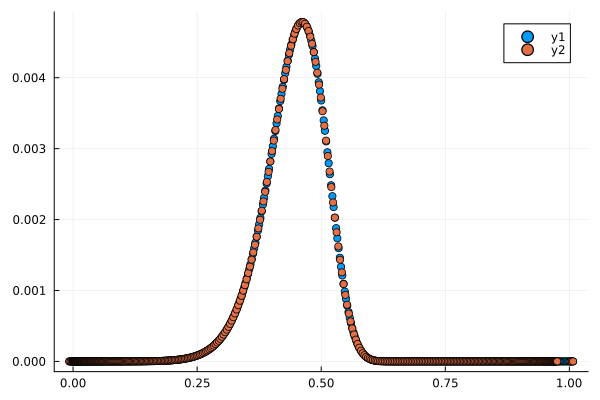

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

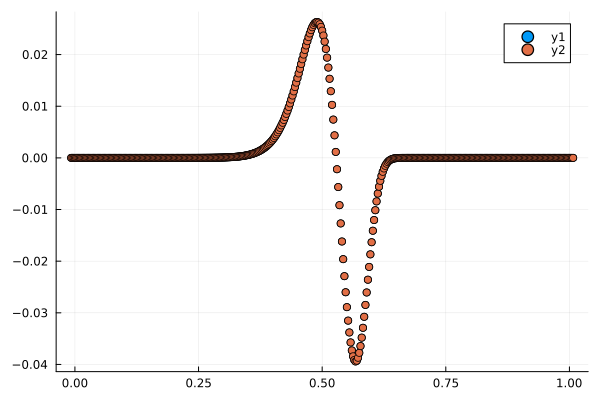

In [417]:
scatter([x1,x1],[y1,y2])